I've tried a bunch of different ways to make circuit diagrams for exams, homework assignments and worksheets. I started out using PowerPoint and copying and pasting clip are together with lines from PowerPoint's shape drawing options. Then making text boxes with variable names. It was a pain.

Next I tried constructing the circuit diagrams in LT Spice. Making the circuit diagram was definely easier in LT Spice. The whole point of LT Spice is to design and analyze circuits. There was a steep learning curve compared to PowerPoint and the final outputs didn't look great. 

Then it was on to LaTeX. There is a LaTeX package called ```circuitikz```. The circuit diagrams made with ```circuitikz``` looked really good (like most things in LaTeX). Once I understood how the coordinate system worked, I was able to construct a set of nice looking circuit diagrams. One issue was that the diagrams were coded direclty into a LaTeX file. I use sharelatex.com for my LaTeX work. It's currently where I keep and edit all the LaTeX code for the book. A minor annoyance is outputing the circuit diagrams for other purposes, like sharing with collegues or for use later in word documents. The circuit diagrams would have to be compiled and rendered as their own LaTeX article. 

In this post, I'm going to show the circuit diagrams I constructed in python using the ```SchemDraw``` package. ```SchemDraw``` is a pip installable python package used to make circuit diagrams. It works great in jupyter notebooks too. I like this quick rendering and prototyping ability of using it in a jupyter notebook.

To install ```SchemDraw``` it is as simple as:

```
pip install SchemDraw
```

I installed it in a virtual environment using ```pip``` instead of ```conda``` because I couldn't find ```SchemDraw``` in any of the conda channels.

The code below starts out with importing matplotlib and calling ```%matplotlib inline```. You only need to use ```%matplotlib``` if you are using a jupyter notebook. There is also a line for making the images vector format on output. For web posting, .png's are fine, but I like the way vector graphics files look in print.

In [1]:
import matplotlib.pyplot as plt
#plt.xkcd() #to make the diagram look hand drawn
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import SchemDraw as schem
import SchemDraw.elements as e

#### For documentation see:
https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html

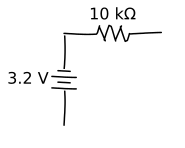

In [2]:
d = schem.Drawing()
d.add(e.BATTERY, d='up', label='3.2 V')
d.add(e.RES, d='right', label='10 k$\Omega$')
d.draw()

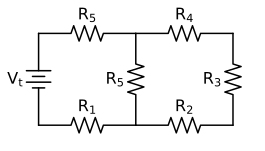

In [3]:
d = schem.Drawing()
V1 = d.add(e.BATTERY, d='down', label='$V_t$')
R1 = d.add(e.RES, d='right', label='$R_1$')
R2 = d.add(e.RES, d='right', label='$R_2$')
R3 = d.add(e.RES, d='up', label='$R_3$')
R4 = d.add(e.RES, d='left', label='$R_4$')
R5 = d.add(e.RES, d='down' , label='$R_5$')
R6 = d.add(e.RES, d='left', xy=R4.end, label='$R_5$')
d.draw()
d.save('five_resistors_two_loops.pdf')

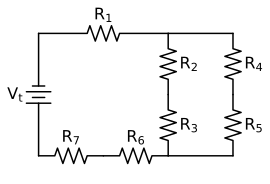

In [4]:
d = schem.Drawing(unit=2)
#start_point = d.add(e.LINE, d='right')
#
#d.add(e.LINE, d='left', l=3)
#R2 = d.add(e.RES, d='down', label='$R_2$')
#R3 = d.add(e.RES, d='down', label='$R_3$')
#d.add(e.LINE, d='right', xy=R1.end, l=3)
#R4 = d.add(e.RES, d='down', label='$R_4$')

#d.add(e.LINE, d='left', l=3)
R7 = d.add(e.RES, d='right', label='$R_7$')
R6 = d.add(e.RES, d='right', label='$R_6$')
d.add(e.LINE, d='right', l=2)
R5 = d.add(e.RES, d='up' , botlabel='$R_5$')
R4 = d.add(e.RES, d='up', botlabel='$R_4$')
d.add(e.LINE, d='left', l=2)
R2 = d.add(e.RES, d='down', botlabel='$R_2$')
R3 = d.add(e.RES, d='down', botlabel='$R_3$')
Vt = d.add(e.BATTERY, d='up', xy=R7.start, toy=R2.start, label='$V_t$')
R1 = d.add(e.RES, d='right',xy=Vt.end, tox=R2.start, label='$R_1$')

d.draw()
d.save('seven_resistors_two_loops.pdf')

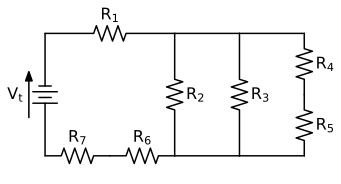

In [32]:
d = schem.Drawing(unit=2)
R7 = d.add(e.RES, d='right', label='$R_7$')
R6 = d.add(e.RES, d='right', label='$R_6$')
d.add(e.LINE, d='right', l=2)
d.add(e.LINE, d='right', l=2)
R5 = d.add(e.RES, d='up' , botlabel='$R_5$')
R4 = d.add(e.RES, d='up', botlabel='$R_4$')
d.add(e.LINE, d='left', l=2)
d.push()
R3 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_3$')
d.pop()
d.add(e.LINE, d='left', l=2)
d.push()
R2 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_2$')
d.pop()
R1 = d.add(e.RES, d='left', tox=R7.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R7.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('seven_resistors_three_loops.pdf')
d.save('seven_resistors_three_loops.png')